# ASSIGNMENT 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function

T·∫°o d·ªØ li·ªáu b·∫±ng c√°ch l·∫•y c√°c ƒëi·ªÉm theo ph√¢n ph·ªëi chu·∫©n c√≥ k·ª≥ v·ªçng t·∫°i (2, 2), (8, 3), (3, 6), ma tr·∫≠n hi·ªáp ph∆∞∆°ng sai gi·ªëng nhau v√† l√† ma tr·∫≠n ƒë∆°n v·ªã. M·ªói c·ª•m c√≥ 200 ƒëi·ªÉmƒëi·ªÉm

In [3]:
np.random.seed(10)

u1 = [2, 2]
u2 = [8, 3]
u3 = [3, 6]
cov = [[1, 0], [0, 1]]
N = 200

cluster1 = np.random.multivariate_normal(u1, cov, N)
cluster2 = np.random.multivariate_normal(u2, cov, N)
cluster3 = np.random.multivariate_normal(u3, cov, N)

clusters = np.concatenate([cluster1, cluster2, cluster3], axis=0)
k = 3
original_label = np.repeat([0, 1, 2], N)

In [4]:
def kmeans_display(clusters, labels, centroids=None):
    cluster1 = clusters[labels == 0]
    cluster2 = clusters[labels == 1]
    cluster3 = clusters[labels == 2]
    
    style_args = {'markersize': 5, 'alpha': 0.8, 'markeredgecolor': 'k'}
    plt.plot(cluster1[:, 0], cluster1[:, 1], 'b^', label='Cluster 1', **style_args)
    plt.plot(cluster2[:, 0], cluster2[:, 1], 'go', label='Cluster 2', **style_args)
    plt.plot(cluster3[:, 0], cluster3[:, 1], 'rs', label='Cluster 3', **style_args)

    # V·∫Ω d·∫•u X t·∫°i c√°c centroid
    if centroids is not None:
        plt.scatter(centroids[:, 0], centroids[:, 1], 
                    marker='X', s=90, c='orange', linewidths=0.3, 
                    label='Centroids', zorder=10)

    plt.axis([-3, 14, -2, 10])
    plt.axis('scaled')
    plt.legend()
    plt.show()


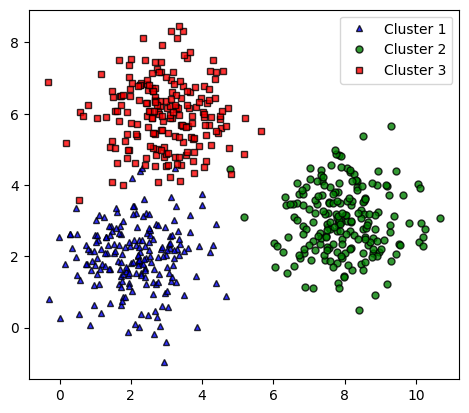

In [5]:
kmeans_display(clusters, original_label)

- kmeans_init_centroids ‚Äî kh·ªüi t·∫°o t√¢m c·ª•m
- kmeans_assign_labels ‚Äî g√°n nh√£n cho m·ªói ƒëi·ªÉm d·ª±a tr√™n t√¢m c·ª•m g·∫ßn nh·∫•t
- kmeans_update_centroids ‚Äî c·∫≠p nh·∫≠t t√¢m c·ª•m m·ªõi
- kmeans_converged ‚Äî ki·ªÉm tra ƒëi·ªÅu ki·ªán h·ªôi t·ª•

In [6]:
from scipy.spatial.distance import cdist

def kmeans_init_centroids(X, k):
    random_idx = np.random.choice(X.shape[0], k, replace=False)
    return X[random_idx]

def kmeans_assign_labels(X, centroids):
    D = cdist(X, centroids) 
    return np.argmin(D, axis=1) 

def kmeans_update_centroids(X, labels, k):
    centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        points = X[labels == i]
        if len(points) > 0:
            centroids[i] = np.mean(points, axis=0)
        else:
            # N·∫øu cluster r·ªóng, ch·ªçn l·∫°i ng·∫´u nhi√™n m·ªôt ƒëi·ªÉm l√†m centroid
            centroids[i] = X[np.random.choice(X.shape[0])]
    return centroids

def kmeans_converged(centroids, new_centroids, tol=1e-6):
    return np.linalg.norm(centroids - new_centroids) < tol

def kmeans(X, k, max_iters=100):
    centroids = kmeans_init_centroids(X, k)
    for it in range(1, max_iters + 1):
        labels = kmeans_assign_labels(X, centroids)
        new_centroids = kmeans_update_centroids(X, labels, k)
        if kmeans_converged(centroids, new_centroids):
            break
        centroids = new_centroids
    return centroids, labels, it
def compute_loss(X, labels, centroids):
    return np.sum((X - centroids[labels])**2)

K-means h·ªôi t·ª• sau 4 v√≤ng l·∫∑p.
To·∫° ƒë·ªô centroids cu·ªëi c√πng:
[[7.96721295 2.98128265]
 [2.10539793 1.93909392]
 [2.98686864 5.97361989]]


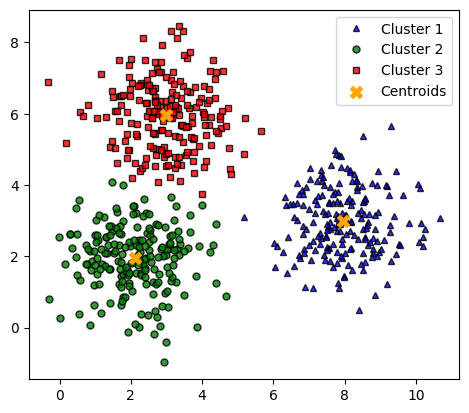

In [8]:
k = 3
centroids, labels, it = kmeans(clusters, k)

print(f"K-means h·ªôi t·ª• sau {it} v√≤ng l·∫∑p.")
print("To·∫° ƒë·ªô centroids cu·ªëi c√πng:")
print(centroids)

kmeans_display(clusters, labels, centroids)


V·ªÅ ph√¢n b·ªë d·ªØ li·ªáu ban ƒë·∫ßu (original_label):
- S·ªë c·ª•m r√µ r√†ng v√† r·ªùi r·∫°c: m·ªói c·ª•m c√≥ ƒë·ªô d√†y ·ªü gi·ªØa v√† lo√£ng d·∫ßn ra b√™n ngo√†i, ph√π h·ª£p v·ªõi ƒë·∫∑c tr∆∞ng c·ªßa ph√¢n ph·ªëi Gaussian. 
- V·ªã tr√≠ c·ª•m t∆∞∆°ng ·ª©ng v·ªõi c√°c ph√¢n ph·ªëi ƒë√£ cho.
- ƒê·ªô ph√¢n t√°ch gi·ªØa c√°c c·ª•m t·ªët: √≠t b·ªã ch·ªìng l·∫•n gi·ªØa c√°c c·ª•m
- H√¨nh d·∫°ng c·ª•m ph√π h·ª£p v·ªõi gi·∫£ ƒë·ªãnh K-means.

Sau khi √°p d·ª•ng K-means, ta th·∫•y:
- Ph√¢n c·ª•m nh√¨n chung ch√≠nh x√°c: 3 c·ª•m cluster1, cluster2, cluster3 ƒë∆∞·ª£c ph√¢n t√°ch r√µ r√†ng v√† g·∫ßn ƒë√∫ng v·ªõi tr·ª±c quan c·ªßa d·ªØ li·ªáu, c√°c c·ª•m kh√¥ng b·ªã ch·ªìng l·∫•n nhau. C√°c centroids t√¨m ƒë∆∞·ª£c kh√° g·∫ßn v·ªõi k·ª≥ v·ªçng ban ƒë·∫ßu, m·∫∑c d√π m√†u s·∫Øc c·ªßa hai c·ª•m xanh, l·ª•c b·ªã ho√°n ƒë·ªïi nh∆∞ng nh·ªØng ƒëi·ªÉm ban ƒë·∫ßu thu·ªôc c√πng m·ªôt cluster v·∫´n c√πng m·ªôt cluster.
- K·∫øt qu·∫£ ph·ª• thu·ªôc nhi·ªÅu v√†o k·∫øt qu·∫£ ban ƒë·∫ßu: h·ªôi t·ª• sau 3 v√≤ng l·∫∑p, ch·ª©ng t·ªè kh·ªüi t·∫°o ban ƒë·∫ßu kh√° t·ªët.
- Tuy nhi√™n, kh√¥ng th·ªÉ ƒë·∫£m b·∫£o ƒë√¢y l√† ph√¢n c·ª•m t·ªëi ∆∞u to√†n c·ª•c. N·∫øu c√≥ nhi·ªÅu nhi·ªÖu, d·ªØ li·ªáu l·ªách t√¢m ho·∫∑c s·ªë c·ª•m k ch∆∞a h·ª£p l√Ω -> d·ªÖ g√¢y ph√¢n c·ª•m sai 

T√≥m l·∫°i, trong assignment 1, k·∫øt qu·∫£ ph√¢n c·ª•m t·ª´ K-means t·ªët v√† h·ªôi t·ª• nhanh nh·ªù kh·ªüi t·∫°o ban ƒë·∫ßu kh√° ph√π h·ª£p. N·∫øu thay ƒë·ªïi kh·ªüi t·∫°o, k·∫øt qu·∫£ c√≥ th·ªÉ r·∫•t kh√°c. 

K·∫æT QU·∫¢ T·ª™ TH∆Ø VI·ªÜN SCIKIT-LEARN

Centers found by Scikit-learns
[[7.96721295 2.98128265]
 [2.98686864 5.97361989]
 [2.10539793 1.93909392]]


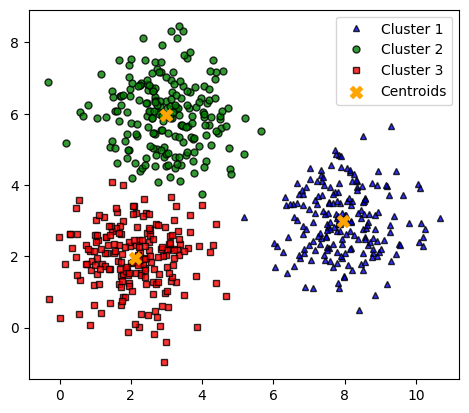

In [9]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=0).fit(clusters)
print('Centers found by Scikit-learns')
print(model.cluster_centers_)
pred_label = model.predict(clusters)
kmeans_display(clusters, pred_label, model.cluster_centers_)

Thu·∫≠t to√°n KMeans c·ªßa Scikit-learn cho k·∫øt qu·∫£ ph√¢n c·ª•m t∆∞∆°ng ƒë·ªìng v·ªõi ph∆∞∆°ng ph√°p th·ªß c√¥ng, c·∫£ v·ªÅ nh√£n c·ª•m v√† v·ªã tr√≠ t√¢m c·ª•m. ƒêi·ªÅu n√†y cho th·∫•y m√¥ h√¨nh ƒë√£ h·ªôi t·ª• t·ªët v√† thu·∫≠t to√°n ho·∫°t ƒë·ªông ·ªïn ƒë·ªãnh tr√™n d·ªØ li·ªáu ƒë·∫ßu v√†o. Scikit-learn ƒë·∫£m b·∫£o t√≠nh ch√≠nh x√°c, t·ªëc ƒë·ªô v√† kh·∫£ nƒÉng m·ªü r·ªông cho c√°c ·ª©ng d·ª•ng th·ª±c t·∫ø.

In [12]:
def plot_kmeans_background(model, clusters):
    import numpy as np
    import matplotlib.pyplot as plt
    
    # T·∫°o l∆∞·ªõi ƒëi·ªÉm ƒë·ªÉ v·∫Ω n·ªÅn
    x_min, x_max = clusters[:, 0].min() - 1, clusters[:, 0].max() + 1
    y_min, y_max = clusters[:, 1].min() - 1, clusters[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    
    distances = np.linalg.norm(grid_points[:, None, :] - model.cluster_centers_[None, :, :], axis=2)
    labels_grid = np.argmin(distances, axis=1)
    
    # Background
    colors = np.array([
        [0.7, 0.85, 1.0], 
        [0.8, 1.0, 0.8],  
        [1.0, 0.8, 0.8]   
    ])
    background_colors = colors[labels_grid]
    
    # V·∫Ω n·ªÅn
    plt.figure(figsize=(8,6))
    plt.scatter(grid_points[:, 0], grid_points[:, 1], color=background_colors, s=5, marker='s', alpha=0.3)


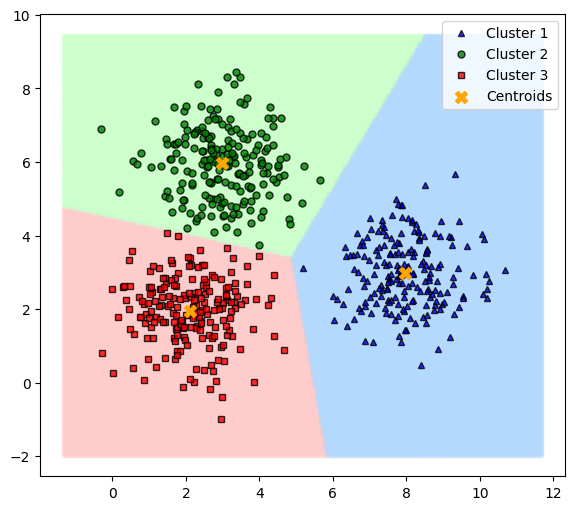

In [9]:
plot_kmeans_background(model, clusters)
kmeans_display(clusters, model.predict(clusters), model.cluster_centers_)

In [10]:
def run_kmeans_multiple_seeds(X, k, seeds, max_iters=100):
    best_loss = float('inf')
    best_result = None

    for seed in seeds:
        np.random.seed(seed)
        centroids, labels, it = kmeans(X, k, max_iters)
        loss = compute_loss(X, labels, centroids)
        print(f"Seed: {seed} | Iterations: {it} | Loss: {loss:.2f}")
        
        if loss < best_loss:
            best_loss = loss
            best_result = (centroids, labels, it, seed)

    print(f"\n Best seed: {best_result[3]} with loss = {best_loss:.2f}")
    return best_result  # Tr·∫£ v·ªÅ k·∫øt qu·∫£ t·ªët nh·∫•t


In [11]:
seeds = range(0, 10)
best_centroids, best_labels, best_iter, best_seed = run_kmeans_multiple_seeds(clusters, k=3, seeds=seeds)

Seed: 0 | Iterations: 4 | Loss: 1059.61
Seed: 1 | Iterations: 5 | Loss: 1059.61
Seed: 2 | Iterations: 4 | Loss: 1059.61
Seed: 3 | Iterations: 4 | Loss: 1059.61
Seed: 4 | Iterations: 5 | Loss: 1059.61
Seed: 5 | Iterations: 4 | Loss: 1059.61
Seed: 6 | Iterations: 5 | Loss: 1059.61
Seed: 7 | Iterations: 3 | Loss: 1059.61
Seed: 8 | Iterations: 5 | Loss: 1059.61
Seed: 9 | Iterations: 4 | Loss: 1059.61

 Best seed: 0 with loss = 1059.61


K·∫øt qu·∫£ cho th·∫•y thu·∫≠t to√°n K-means h·ªôi t·ª• nhanh (3-5 v√≤ng l·∫∑p), loss ·ªïn ƒë·ªãnh v√† gi·ªëng nhau cho c√°c seed kh√°c nhau, ch·ª©ng t·ªè kh·ªüi t·∫°o centroid ng·∫´u nhi√™n ƒë·ªÅu h·ª£p l√Ω v√† thu·∫≠t to√°n ho·∫°t ƒë·ªông t·ªët, ·ªïn ƒë·ªãnh tr√™n d·ªØ li·ªáu toy. ƒê√¢y l√† k·∫øt qu·∫£ mong mu·ªën, th·ªÉ hi·ªán vi·ªác kh·ªüi t·∫°o centroid ·∫£nh h∆∞·ªüng ƒë·∫øn t·ªëc ƒë·ªô h·ªôi t·ª• nh∆∞ng k·∫øt qu·∫£ cu·ªëi c√πng v·∫´n nh·∫•t qu√°n.

In [11]:
import numpy as np
for i in range(6):
    np.random.seed(9+i)
    centroids, labels, it = kmeans(clusters, k)
    print("seed number: ", 9+i, "number of iterations:", it)

seed number:  9 number of iterations: 4
seed number:  10 number of iterations: 3
seed number:  11 number of iterations: 15
seed number:  12 number of iterations: 9
seed number:  13 number of iterations: 5
seed number:  14 number of iterations: 3


- K·∫øt qu·∫£ cho th·∫•y K-means h·ªôi t·ª• nhanh v·ªõi h·∫ßu h·∫øt c√°c seed (3‚Äì5 v√≤ng), ch·ªâ v√†i seed m·∫•t nhi·ªÅu v√≤ng h∆°n (t·ªëi ƒëa 15) do kh·ªüi t·∫°o kh√¥ng t·ªëi ∆∞u. ƒêi·ªÅu n√†y ch·ª©ng t·ªè thu·∫≠t to√°n ·ªïn ƒë·ªãnh v√† nh·∫°y v·ªõi ƒëi·ªÉm kh·ªüi t·∫°o.
- S·ªë v√≤ng l·∫∑p h·ªôi t·ª• c·ªßa K-means thay ƒë·ªïi theo seed kh·ªüi t·∫°o v√¨ thu·∫≠t to√°n nh·∫°y v·ªõi v·ªã tr√≠ centroid ban ƒë·∫ßu. Seed t·ªët gi√∫p h·ªôi t·ª• nhanh, seed k√©m l√†m ch·∫≠m qu√° tr√¨nh. Tuy nhi√™n, k·∫øt qu·∫£ cu·ªëi c√πng v·ªÅ loss th∆∞·ªùng t∆∞∆°ng t·ª±.

In [12]:
for i in range(60):
    np.random.seed(i)
    centroids, labels, it = kmeans(clusters, k)
    print(centroids[-1])

[7.96721295 2.98128265]
[7.96721295 2.98128265]
[2.10539793 1.93909392]
[2.98686864 5.97361989]
[7.96721295 2.98128265]
[2.98686864 5.97361989]
[2.98686864 5.97361989]
[2.98686864 5.97361989]
[7.96721295 2.98128265]
[2.10539793 1.93909392]
[2.98686864 5.97361989]
[2.53852763 3.98539818]
[8.41995689 3.63898619]
[2.10539793 1.93909392]
[2.98686864 5.97361989]
[7.96721295 2.98128265]
[7.96721295 2.98128265]
[2.98686864 5.97361989]
[7.96721295 2.98128265]
[2.10539793 1.93909392]
[7.96721295 2.98128265]
[7.96721295 2.98128265]
[8.23257574 2.41167509]
[7.22699444 2.24231071]
[2.10539793 1.93909392]
[7.96721295 2.98128265]
[7.96721295 2.98128265]
[2.10539793 1.93909392]
[2.98686864 5.97361989]
[2.10539793 1.93909392]
[2.98686864 5.97361989]
[7.96721295 2.98128265]
[2.98686864 5.97361989]
[2.10539793 1.93909392]
[2.10539793 1.93909392]
[7.32193133 3.41576958]
[2.98686864 5.97361989]
[2.98686864 5.97361989]
[7.96721295 2.98128265]
[2.10539793 1.93909392]
[2.98686864 5.97361989]
[2.98686864 5.97

C√°c centroid kh√¥ng tr√πng nhau 

In [34]:
import matplotlib.pyplot as plt
import numpy as np

def kmeans_display_with_background(clusters, centroids, labels, it):
    x_min, x_max = clusters[:, 0].min() - 1, clusters[:, 0].max() + 1
    y_min, y_max = clusters[:, 1].min() - 1, clusters[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    
    distances = np.linalg.norm(grid_points[:, None, :] - centroids[None, :, :], axis=2)
    labels_grid = np.argmin(distances, axis=1)
    
    colors = np.array([
        [0.7, 0.85, 1.0], 
        [0.8, 1.0, 0.8],  
        [1.0, 0.8, 0.8]   
    ])
    background_colors = colors[labels_grid]
    
    plt.figure(figsize=(8, 6))
    plt.scatter(grid_points[:, 0], grid_points[:, 1], color=background_colors, s=5, marker='s', alpha=0.3)

    # G·ªçi l·∫°i kmeans_display ƒë·ªÉ v·∫Ω c√°c c·ª•m
    kmeans_display(clusters, labels, centroids)


10


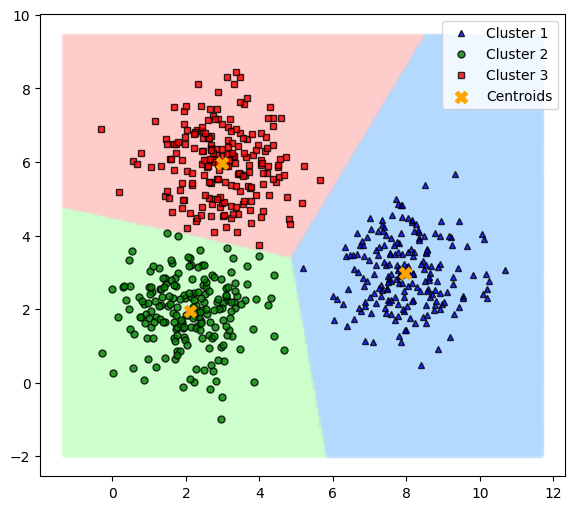

33


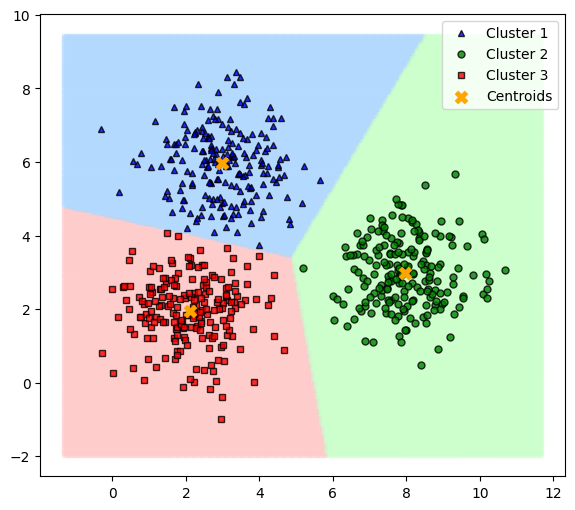

27


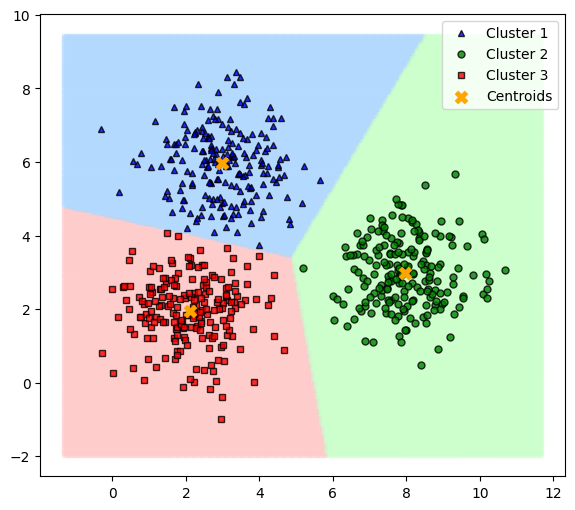

In [14]:
for i in [10, 33, 27]:
    np.random.seed(i)
    centroids, labels, it = kmeans(clusters, k)
    it = len(labels) - 1
    print(i)
    kmeans_display_with_background(clusters, centroids, labels, it)

Vi·ªác kh·ªüi t·∫°o t√¢m c·ª•m (centroids) ng·∫´u nhi√™n ·∫£nh h∆∞·ªüng ƒë√°ng k·ªÉ ƒë·∫øn hi·ªáu su·∫•t c·ªßa K-Means v√¨:

N·∫øu c√°c t√¢m c·ª•m ban ƒë·∫ßu ƒë∆∞·ª£c ch·ªçn g·∫ßn nhau ho·∫∑c kh√¥ng ƒë·∫°i di·ªán, thu·∫≠t to√°n c√≥ th·ªÉ:

- H·ªôi t·ª• ch·∫≠m h∆°n
- R∆°i v√†o c·ª±c tr·ªã ƒë·ªãa ph∆∞∆°ng
- Ph√¢n c·ª•m sai l·ªách

Ng∆∞·ª£c l·∫°i, n·∫øu kh·ªüi t·∫°o t·ªët, K-Means s·∫Ω:

- H·ªôi t·ª• nhanh
- T√¨m ƒë∆∞·ª£c ph√¢n c·ª•m ch√≠nh x√°c h∆°n

K·∫øt lu·∫≠n: Kh·ªüi t·∫°o ng·∫´u nhi√™n l√†m cho k·∫øt qu·∫£ K-Means kh√¥ng ·ªïn ƒë·ªãnh, v√¨ v·∫≠y n√™n ch·∫°y nhi·ªÅu l·∫ßn v·ªõi c√°c seed kh√°c nhau ho·∫∑c s·ª≠ d·ª•ng ph∆∞∆°ng ph√°p kh·ªüi t·∫°o t·ªët h∆°n

# ASSIGNMENT 2 

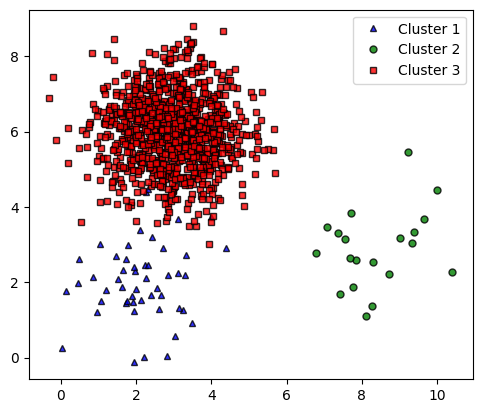

In [12]:
np.random.seed(10)

u1 = [2, 2]
u2 = [8, 3]
u3 = [3, 6] 
cov = [[1, 0], [0, 1]]
N = [50, 20, 1000]

cluster1 = np.random.multivariate_normal(u1, cov, 50)
cluster2 = np.random.multivariate_normal(u2, cov, 20)
cluster3 = np.random.multivariate_normal(u3, cov, 1000)
clusters = np.concatenate([cluster1, cluster2, cluster3], axis=0)
original_label = np.repeat([0, 1, 2], N)

kmeans_display(clusters, original_label)

K-means h·ªôi t·ª• sau 27 v√≤ng l·∫∑p.
To·∫° ƒë·ªô centroids cu·ªëi c√πng:
[[2.35212925 4.0274731 ]
 [4.32835926 5.50403592]
 [2.56190952 6.50725446]]


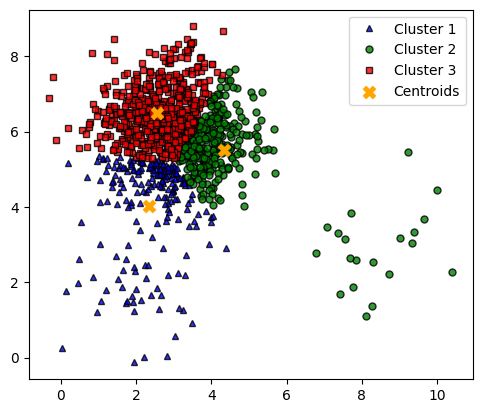

In [87]:
k = 3
(centroids, labels, it) = kmeans(clusters, k)

print(f"K-means h·ªôi t·ª• sau {it} v√≤ng l·∫∑p.")
print("To·∫° ƒë·ªô centroids cu·ªëi c√πng:")
print(centroids)

kmeans_display(clusters, labels, centroids)

C√°c centroid ƒë·ªÅu n·∫±m g·∫ßn v√πng d·ªØ li·ªáu ban ƒë·∫ßu, nh∆∞ng kh√°c so v·ªõi c√°c ƒëi·ªÉm trung b√¨nh g·ªëc:

- C·ª•m 3 ban ƒë·∫ßu c√≥ t√¢m t·∫°i (3, 6) nh∆∞ng centroid cu·ªëi l·∫°i th√†nh (2.56, 6.5) l·ªách kh√° nhi·ªÅu v·ªÅ tr·ª•c x.

- C·ª•m 1 v√† 2 ban ƒë·∫ßu ·ªü (2,2) v√† (8,3) th√¨ centroid m·ªõi l·∫°i l·∫´n l·ªôn quanh (2.35, 4.03) v√† (4.33, 5.5), t·ª©c c·∫£ hai centroid n√†y d∆∞·ªùng nh∆∞ ‚Äúd·ªìn v√†o nhau‚Äù h∆°n.

Nguy√™n nh√¢n ch√≠nh:

C·ª•m l·ªõn (v·ªõi 1000 ƒëi·ªÉm) c√≥ tr·ªçng l∆∞·ª£ng r·∫•t l·ªõn, k√©o c√°c centroid nh·ªè v·ªÅ ph√≠a m√¨nh.

C√°c ƒëi·ªÉm nh·ªè l·∫ª, ph√¢n t√°n ·ªü c√°c v·ªã tr√≠ ban ƒë·∫ßu (nh∆∞ c·ª•m nh·ªè 20 ƒëi·ªÉm g·∫ßn (8,3)) c√≥ th·ªÉ b·ªã c·ª•m l·ªõn ‚Äúh√∫t‚Äù v√† g·ªôp nh·∫ßm.

Qua ƒë√≥ c√≥ th·ªÉ th·∫•y:
- K-means ∆∞u ti√™n t·ªëi thi·ªÉu t·ªïng b√¨nh ph∆∞∆°ng kho·∫£ng c√°ch (WCSS), kh√¥ng quan t√¢m ph√¢n b·ªë ban ƒë·∫ßu ho·∫∑c t·ª∑ l·ªá c·ª•m.

- C√°c centroid c√≥ th·ªÉ d·ªãch chuy·ªÉn ƒë√°ng k·ªÉ, ƒë·∫∑c bi·ªát khi s·ªë l∆∞·ª£ng ƒëi·ªÉm gi·ªØa c√°c c·ª•m ch√™nh l·ªách l·ªõn.

- K·∫øt qu·∫£ centroid cu·ªëi c√πng cho th·∫•y c√°c c·ª•m nh·ªè kh√¥ng c√≤n gi·ªØ v·ªã tr√≠ ban ƒë·∫ßu, c√≥ th·ªÉ b·ªã h√≤a l·∫´n ho·∫∑c l·ªách.


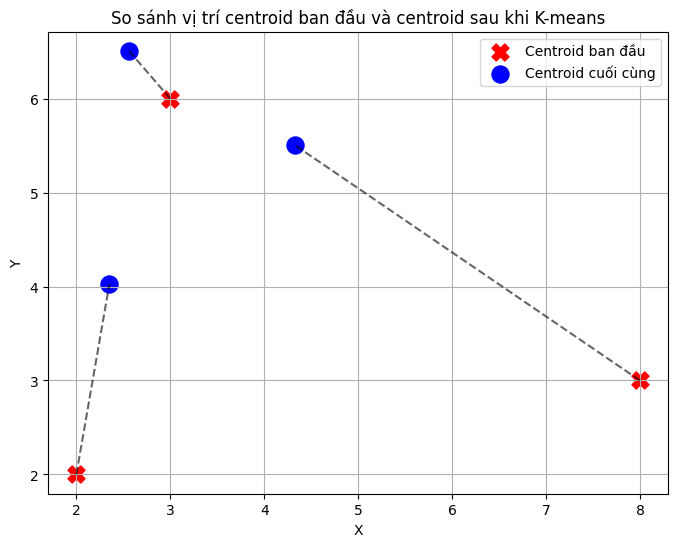

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# T·ªça ƒë·ªô centroid ban ƒë·∫ßu 
initial_centroids = np.array([
    [2, 2],
    [8, 3],
    [3, 6]
])

centroids_final = np.array([
    [2.35212925, 4.0274731],
    [4.32835926, 5.50403592],
    [2.56190952, 6.50725446]
])

plt.figure(figsize=(8,6))
plt.scatter(initial_centroids[:, 0], initial_centroids[:, 1], 
            c='red', marker='X', s=150, label='Centroid ban ƒë·∫ßu')
plt.scatter(centroids_final[:, 0], centroids_final[:, 1], 
            c='blue', marker='o', s=150, label='Centroid cu·ªëi c√πng')

for i in range(len(initial_centroids)):
    plt.plot([initial_centroids[i, 0], centroids_final[i, 0]],
             [initial_centroids[i, 1], centroids_final[i, 1]], 'k--', alpha=0.6)

plt.title('So s√°nh v·ªã tr√≠ centroid ban ƒë·∫ßu v√† centroid sau khi K-means')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


Centers found by Scikit-learns
[[2.62265395 4.29930087]
 [3.02933502 6.37283148]
 [8.38173153 2.89756777]]


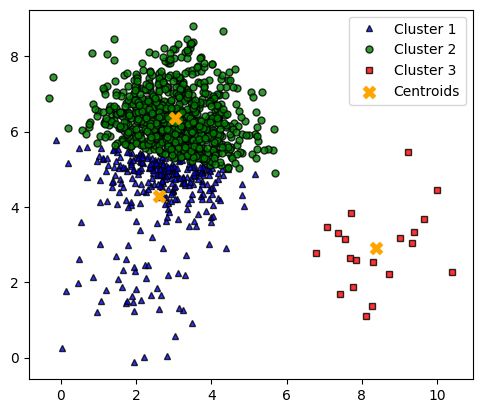

In [24]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=0).fit(clusters)
print('Centers found by Scikit-learns')
print(model.cluster_centers_)
pred_label = model.predict(clusters)
kmeans_display(clusters, pred_label, model.cluster_centers_)

M√†u s·∫Øc c√°c c·ª•m thay ƒë·ªïi v·ªã tr√≠

[2.6226, 4.2993]
- Trung t√¢m m·ªõi c·ªßa c·ª•m g·ªìm ƒëi·ªÉm t·ª´ cluster1 v√† m·ªôt ph·∫ßn cluster3. Do cluster1 ch·ªâ c√≥ 50 ƒëi·ªÉm, c√≤n cluster3 t·ªõi 1000 ƒëi·ªÉm n√™n centroid b·ªã k√©o v·ªÅ ph√≠a cluster3. ƒê√¢y c√≥ th·ªÉ l√† c·ª•m ‚Äútr·ªôn‚Äù gi·ªØa cluster1 v√† cluster3.

[3.0293, 6.3728]
- G·∫ßn v·ªõi cluster3 g·ªëc [3, 6] ‚Üí r·∫•t nhi·ªÅu ƒëi·ªÉm n√™n t√¢m c·ª•m n√†y kh√° ·ªïn ƒë·ªãnh. ƒê√¢y g·∫ßn nh∆∞ ch·∫Øc ch·∫Øn l√† c·ª•m ƒë·∫°i di·ªán cho cluster3.

[8.3817, 2.8976]
- G·∫ßn v·ªõi cluster2 g·ªëc [8, 3], c·ª•m nh·ªè ch·ªâ c√≥ 20 ƒëi·ªÉm ‚Üí tuy nh·ªè nh∆∞ng v·∫´n ƒë∆∞·ª£c t√°ch ri√™ng nh·ªù c√°ch ly r√µ r·ªát v·ªÅ kh√¥ng gian. ƒê√¢y l√† cluster2, m·∫∑c d√π √≠t ƒëi·ªÉm nh∆∞ng v·ªã tr√≠ t·ªët n√™n v·∫´n ƒë∆∞·ª£c t√°ch ri√™ng.

Tuy nhi√™n:
- Cluster1 b·ªã ‚Äúnh·∫•n ch√¨m‚Äù m·ªôt ph·∫ßn b·ªüi cluster3.
- Cluster3 gi·ªØ ƒë∆∞·ª£c v·ªã tr√≠ do s·ªë ƒëi·ªÉm l·ªõn.
- Cluster2 ƒë∆∞·ª£c gi·ªØ nguy√™n do t√°ch bi·ªát trong kh√¥ng gian.

Nguy√™n nh√¢n c√≥ th·ªÉ do: 
- KMeans b·ªã ·∫£nh h∆∞·ªüng b·ªüi s·ªë l∆∞·ª£ng ƒëi·ªÉm trong c·ª•m do n√≥ t·ªëi ∆∞u t·ªïng kho·∫£ng c√°ch.
- Cluster3 c√≥ 1000 ƒëi·ªÉm ‚Üí r·∫•t ‚Äún·∫∑ng‚Äù, d·ªÖ k√©o t√¢m c·ª•m v·ªÅ ph√≠a m√¨nh.
- Cluster1 ch·ªâ c√≥ 50 ƒëi·ªÉm ‚Üí d·ªÖ b·ªã ho√† v√†o c·ª•m l·ªõn h∆°n.
- Cluster2 tuy nh·ªè nh∆∞ng c√°ch bi·ªát, n√™n v·∫´n ƒë∆∞·ª£c gi·ªØ ri√™ng.

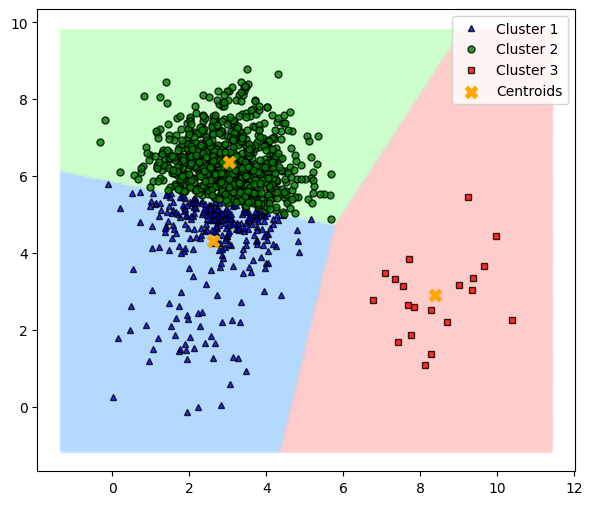

In [70]:
plot_kmeans_background(model, clusters)
kmeans_display(clusters, model.predict(clusters), model.cluster_centers_)

- Cluster 3 (1000 ƒëi·ªÉm) chi·∫øm ∆∞u th·∫ø l·ªõn ‚Üí centroid r·∫•t ·ªïn ƒë·ªãnh.
- Cluster 1 (50 ƒëi·ªÉm) v√† Cluster 2 (20 ƒëi·ªÉm) b·ªã ·∫£nh h∆∞·ªüng b·ªüi c·ª•m l·ªõn ‚Üí d·ªÖ b·ªã l·ªách ho·∫∑c g√°n sai nh√£n.
- K-means kh√¥ng ph√π h·ª£p v·ªõi d·ªØ li·ªáu m·∫•t c√¢n b·∫±ng v√¨ nh·∫°y c·∫£m v·ªõi k√≠ch th∆∞·ªõc c·ª•m.
- Nh√£n sau ph√¢n c·ª•m c√≥ th·ªÉ b·ªã ho√°n ƒë·ªïi do K-means g√°n nh√£n ng·∫´u nhi√™n.

In [101]:
seeds = range(0, 10)
best_centroids, best_labels, best_iter, best_seed = run_kmeans_multiple_seeds(clusters, k=3, seeds=seeds)

Seed: 0 | Iterations: 18 | Loss: 1843.62
Seed: 1 | Iterations: 13 | Loss: 1843.58
Seed: 2 | Iterations: 17 | Loss: 1843.62
Seed: 3 | Iterations: 17 | Loss: 1843.72
Seed: 4 | Iterations: 11 | Loss: 1855.50
Seed: 5 | Iterations: 15 | Loss: 1855.63
Seed: 6 | Iterations: 17 | Loss: 1855.63
Seed: 7 | Iterations: 18 | Loss: 1855.63
Seed: 8 | Iterations: 13 | Loss: 1843.58
Seed: 9 | Iterations: 18 | Loss: 1855.63

 Best seed: 1 with loss = 1843.58


Trong 10 l·∫ßn ch·∫°y th·ª≠ seed 1 cho k·∫øt qu·∫£ t·ªët nh·∫•t v√¨ loss th·∫•p nh·∫•t

In [102]:
import numpy as np
for i in range(6):
    np.random.seed(9+i)
    centroids, labels, it = kmeans(clusters, k)
    print("seed number: ", 9+i, "number of iterations:", it)

seed number:  9 number of iterations: 18
seed number:  10 number of iterations: 27
seed number:  11 number of iterations: 24
seed number:  12 number of iterations: 13
seed number:  13 number of iterations: 20
seed number:  14 number of iterations: 18


S·ªë v√≤ng l·∫∑p (iterations) trong K-means bi·∫øn ƒë·ªông khi thay ƒë·ªïi seed, kh√¥ng ·ªïn ƒë·ªãnh. Seed 10 c·∫ßn nhi·ªÅu v√≤ng l·∫∑p nh·∫•t (27), seed 12 √≠t nh·∫•t (13). ƒêi·ªÅu n√†y cho th·∫•y k·∫øt qu·∫£ v√† t·ªëc ƒë·ªô h·ªôi t·ª• c·ªßa K-means ph·ª• thu·ªôc nhi·ªÅu v√†o gi√° tr·ªã seed kh·ªüi t·∫°o.

In [103]:
for i in range(60):
    np.random.seed(i)
    centroids, labels, it = kmeans(clusters, k)
    print(centroids[-1])

[2.35212925 4.0274731 ]
[2.35212925 4.0274731 ]
[4.32835926 5.50403592]
[4.31040299 5.5194038 ]
[3.72918536 2.88182004]
[3.66932269 3.13061997]
[3.66932269 3.13061997]
[2.13407235 5.94818384]
[4.30644688 5.51900524]
[2.13407235 5.94818384]
[8.38173153 2.89756777]
[2.56190952 6.50725446]
[3.70754084 6.26064429]
[3.73909669 6.22873257]
[3.66932269 3.13061997]
[2.33542069 3.47140774]
[8.38173153 2.89756777]
[2.13399843 5.94420707]
[2.56190952 6.50725446]
[3.67967275 2.53449505]
[2.35212925 4.0274731 ]
[3.73909669 6.22873257]
[3.70754084 6.26064429]
[2.50060493 6.3749716 ]
[2.13399843 5.94420707]
[3.70754084 6.26064429]
[4.30644688 5.51900524]
[2.36939934 3.99666796]
[2.33284312 3.51414367]
[2.54873401 6.51333213]
[2.14379455 5.92517443]
[2.50774006 6.4193567 ]
[3.70600074 6.22077584]
[3.71922042 6.24039982]
[3.54629207 2.80101927]
[3.68178001 3.12293452]
[2.35212925 4.0274731 ]
[3.71922042 6.24039982]
[4.31106168 5.52601793]
[3.72918536 2.88182004]
[2.55725827 6.50635485]
[3.70754084 6.26

10


C:\Users\Hp X2 G3\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


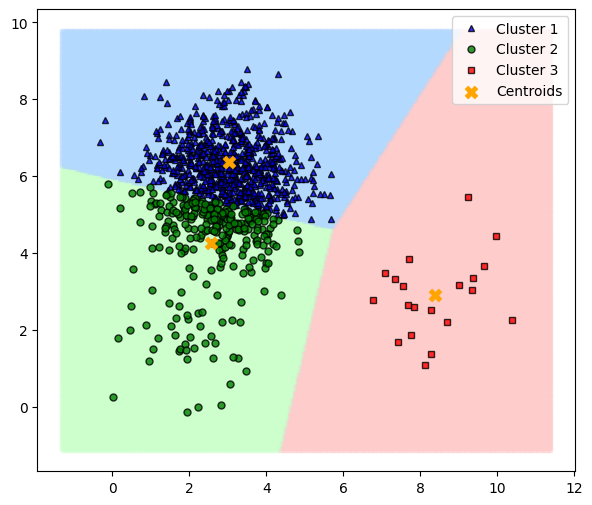

33


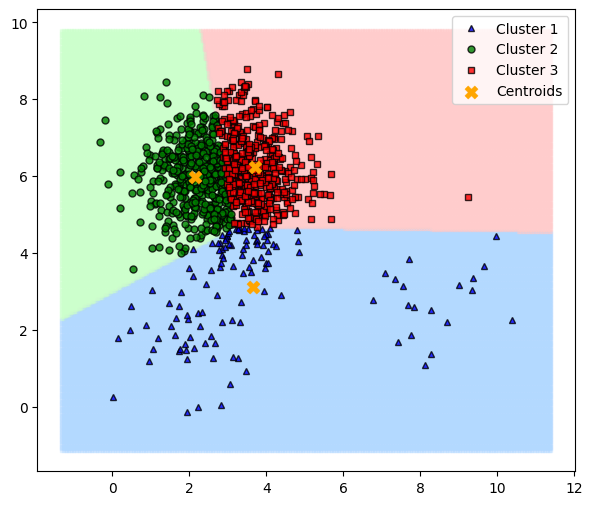

27


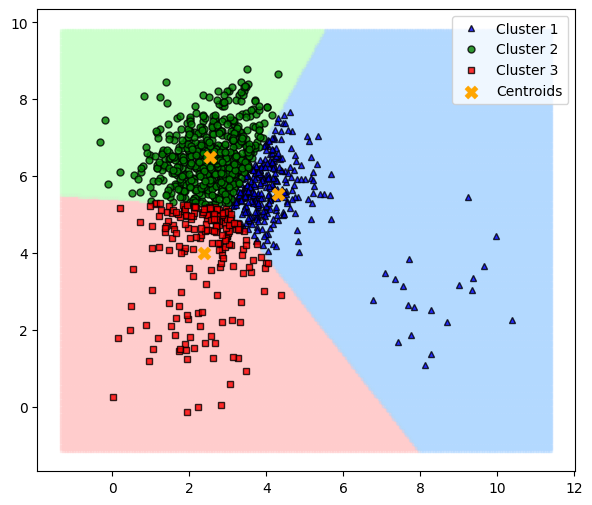

In [104]:
for i in [10, 33, 27]:
    np.random.seed(i)
    centroids, labels, it = kmeans(clusters, k)
    it = len(labels) - 1
    print(i)
    kmeans_display_with_background(clusters, centroids, labels, it)

V·ªõi t·ª´ng seed kh√°c nhau, c√°c c·ª•m ph√¢n b·ªë kh√°c bi·ªát.

Trong b√†i to√°n n√†y, ba c·ª•m c√≥ k√≠ch th∆∞·ªõc r·∫•t kh√°c nhau: 50, 20, v√† 1000 ƒëi·ªÉm. ƒêi·ªÅu n√†y ·∫£nh h∆∞·ªüng l·ªõn ƒë·∫øn hi·ªáu su·∫•t c·ªßa K-Means v√¨ thu·∫≠t to√°n n√†y t·ªëi ∆∞u t·ªïng b√¨nh ph∆∞∆°ng kho·∫£ng c√°ch ƒë·∫øn t√¢m c·ª•m, n√™n c·ª•m c√≥ nhi·ªÅu ƒëi·ªÉm h∆°n s·∫Ω chi ph·ªëi m·∫°nh h∆°n trong qu√° tr√¨nh hu·∫•n luy·ªán.

H·ªá qu·∫£ l√†:

- C·ª•m l·ªõn (1000 ƒëi·ªÉm) c√≥ th·ªÉ k√©o t√¢m c·ª•m v·ªÅ ph√≠a m√¨nh, l√†m l·ªách ranh gi·ªõi ph√¢n c·ª•m.
- C√°c c·ª•m nh·ªè (50 v√† 20 ƒëi·ªÉm) d·ªÖ b·ªã g·ªôp chung ho·∫∑c b·ªè qua, d·∫´n ƒë·∫øn ph√¢n c·ª•m sai.
- K·∫øt qu·∫£ ph√¢n c·ª•m kh√¥ng ph·∫£n √°nh ƒë√∫ng c·∫•u tr√∫c th·ª±c t·∫ø c·ªßa d·ªØ li·ªáu.

K·∫øt lu·∫≠n: K-Means kh√¥ng ph√π h·ª£p khi c√°c c·ª•m c√≥ k√≠ch th∆∞·ªõc ch√™nh l·ªách l·ªõn, v√† c·∫ßn ƒë∆∞·ª£c thay th·∫ø ho·∫∑c c·∫£i ti·∫øn 

# ASSIGNMENT 3

In [26]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
u1 = [2, 2]
u2 = [8, 3]
u3 = [3, 6]

cov1 = [[1, 0], [0, 1]]
cov2 = [[1, 0], [0, 1]]
cov3 = [[10, 0], [0, 1]] 
N = 200

cluster1 = np.random.multivariate_normal(u1, cov1, N)
cluster2 = np.random.multivariate_normal(u2, cov2, N)
cluster3 = np.random.multivariate_normal(u3, cov3, N)

clusters = np.concatenate([cluster1, cluster2, cluster3], axis=0)
original_labels = np.repeat([0, 1, 2], N)


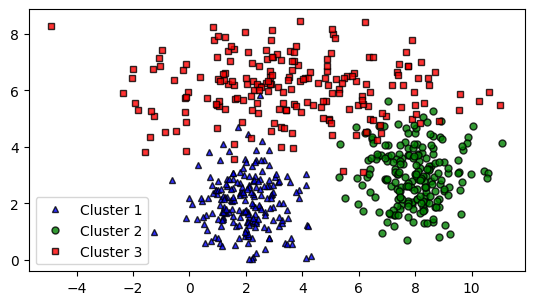

In [27]:

kmeans_display(clusters, original_label)

C√≥ th·ªÉ th·∫•y, cluster1 v√† cluster2 theo $\Sigma_1$ n√™n k√≠ch th∆∞·ªõc tr√≤n ƒë·ªÅu (ph√¢n ph·ªëi Gaussian c√≥ ph∆∞∆°ng sai b·∫±ng 1 theo c·∫£ 2 chi·ªÅu), c√≤n cluster3 theo $\Sigma_2$ n√™n b·ªã k√©o d√£n theo chi·ªÅu ngang, t·∫°o h√¨nh d·∫°ng elip d√†i h∆°n, kh√¥ng ƒë·ªëi x·ª©ng nh∆∞ 2 cluster c√≤n l·∫°i

K-means h·ªôi t·ª• sau 20 v√≤ng l·∫∑p.
To·∫° ƒë·ªô centroids cu·ªëi c√πng:
[[7.84137863 3.49811562]
 [2.53481065 6.28740649]
 [1.94139558 2.07448304]]


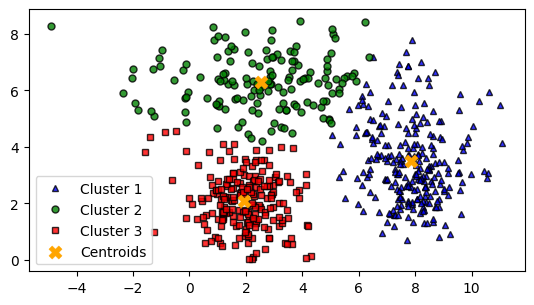

In [28]:
k = 3
centroids, labels, it = kmeans(clusters, k)

print(f"K-means h·ªôi t·ª• sau {it} v√≤ng l·∫∑p.")
print("To·∫° ƒë·ªô centroids cu·ªëi c√πng:")
print(centroids)

kmeans_display(clusters, labels, centroids)


Thu·∫≠t to√°n K-means ƒë√£ h·ªôi t·ª• sau 20 v√≤ng l·∫∑p, cho th·∫•y qu√° tr√¨nh c·∫≠p nh·∫≠t centroid v√† g√°n nh√£n cho c√°c ƒëi·ªÉm d·ªØ li·ªáu ƒë√£ ·ªïn ƒë·ªãnh, kh√¥ng c√≤n thay ƒë·ªïi ƒë√°ng k·ªÉ.

Quan s√°t v·ªã tr√≠ centroid:

- Centroid ƒë·∫ßu ti√™n g·∫ßn v·ªõi cluster c√≥ trung t√¢m (8,3).

- Centroid th·ª© hai g·∫ßn v·ªõi cluster c√≥ trung t√¢m (3,6), tuy nhi√™n v·ªã tr√≠ c√≥ ph·∫ßn d·ªãch l√™n tr√™n so v·ªõi ƒëi·ªÉm g·ªëc do ph√¢n ph·ªëi $\Sigma_2$
   k√©o d√£n theo chi·ªÅu ngang.

- Centroid th·ª© ba g·∫ßn v·ªõi cluster c√≥ trung t√¢m (2,2).

K·∫øt qu·∫£ cho th·∫•y K-means ph√¢n t√°ch ƒë∆∞·ª£c kh√° ch√≠nh x√°c 3 c·ª•m theo d·ªØ li·ªáu, d√π cluster th·ª© hai c√≥ ph∆∞∆°ng sai kh√°c bi·ªát l·ªõn theo chi·ªÅu ngang.

Tuy nhi√™n, v√¨ cluster th·ª© hai c√≥ ph∆∞∆°ng sai l·ªõn (k√©o d√£n theo chi·ªÅu 
ùë•), centroid c·ªßa c·ª•m n√†y c√≥ th·ªÉ b·ªã l·ªách so v·ªõi v·ªã tr√≠ trung t√¢m th·ª±c c·ªßa ph√¢n ph·ªëi do K-means s·ª≠ d·ª•ng kho·∫£ng c√°ch Euclid, kh√¥ng t√≠nh ƒë·∫øn h√¨nh d·∫°ng ho·∫∑c ph∆∞∆°ng sai c·ª•m.

ƒêi·ªÅu n√†y th·ªÉ hi·ªán gi·ªõi h·∫°n c·ªßa K-means khi x·ª≠ l√Ω c√°c c·ª•m c√≥ k√≠ch th∆∞·ªõc ho·∫∑c h√¨nh d·∫°ng kh√°c nhau, l√†m gi·∫£m hi·ªáu qu·∫£ ph√¢n c·ª•m trong tr∆∞·ªùng h·ª£p ph√¢n ph·ªëi kh√¥ng ƒë·ªìng nh·∫•t.



K-MEANS T·ª™ SCIKIT-LEARNS

Centers found by Scikit-learns
[[7.82773082 3.52419383]
 [2.44220016 6.25733703]
 [1.96713809 2.05011551]]


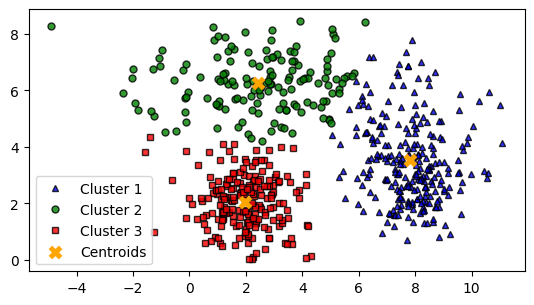

In [29]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=0).fit(clusters)
print('Centers found by Scikit-learns')
print(model.cluster_centers_)
pred_label = model.predict(clusters)
kmeans_display(clusters, pred_label, model.cluster_centers_)

Kh√¥ng kh√°c bi·ªát m·∫•y so v·ªõi K-Means ƒë√£ tri·ªÉn khai 

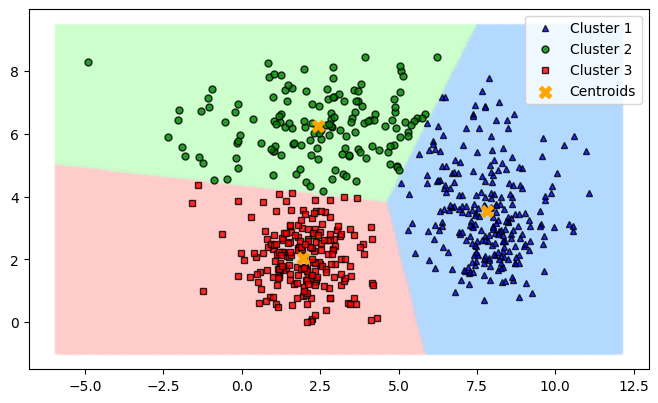

In [23]:
plot_kmeans_background(model, clusters)
kmeans_display(clusters, model.predict(clusters), model.cluster_centers_)

C·ª•m ·ªü g√≥c d∆∞·ªõi tr√°i (g·∫ßn t·ªça ƒë·ªô (2, 2)):

- C√°c ƒëi·ªÉm t·∫≠p trung t·ªët, c·ª•m r√µ r√†ng.
- T√¢m c·ª•m n·∫±m g·∫ßn trung t√¢m ph√¢n ph·ªëi g·ªëc ‚Üí K-Means ho·∫°t ƒë·ªông t·ªët ·ªü ƒë√¢y.

C·ª•m ·ªü ph√≠a b√™n ph·∫£i (g·∫ßn t·ªça ƒë·ªô (8, 3)):
- C≈©ng l√† m·ªôt c·ª•m r√µ r√†ng, c√°c ƒëi·ªÉm g·∫ßn nhau.
- T√¢m c·ª•m ƒë∆∞·ª£c x√°c ƒë·ªãnh ch√≠nh x√°c.

C·ª•m tr·∫£i d√†i theo tr·ª•c X (g·∫ßn t·ªça ƒë·ªô (3, 6)):
- ƒê√¢y l√† c·ª•m t·ª´ ph√¢n ph·ªëi c√≥ ph∆∞∆°ng sai l·ªõn 
Œ£
2
‚Äã
 .
- C√°c ƒëi·ªÉm b·ªã tr·∫£i r·ªông theo chi·ªÅu ngang, t·∫°o th√†nh m·ªôt d·∫£i d√†i.
- T√¢m c·ª•m n·∫±m g·∫ßn trung t√¢m h√¨nh h·ªçc, nh∆∞ng kh√¥ng ph·∫£n √°nh t·ªët c·∫•u tr√∫c ph√¢n ph·ªëi.
- M·ªôt s·ªë ƒëi·ªÉm ·ªü r√¨a c·ª•m c√≥ th·ªÉ b·ªã g√°n nh·∫ßm sang c·ª•m kh√°c.

 K·∫øt lu·∫≠n

- K-Means ho·∫°t ƒë·ªông t·ªët v·ªõi c√°c c·ª•m c√≥ h√¨nh d·∫°ng tr√≤n v√† ph∆∞∆°ng sai ƒë·ªìng ƒë·ªÅu.
- V·ªõi c·ª•m c√≥ ph∆∞∆°ng sai l·ªõn v√† h√¨nh d·∫°ng k√©o d√†i, K-Means g·∫∑p kh√≥ khƒÉn trong vi·ªác x√°c ƒë·ªãnh ranh gi·ªõi v√† t√¢m c·ª•m ch√≠nh x√°c.
- ƒêi·ªÅu n√†y cho th·∫•y K-Means kh√¥ng ph√π h·ª£p v·ªõi d·ªØ li·ªáu c√≥ ph∆∞∆°ng sai kh√¥ng ƒë·ªìng nh·∫•t, v√† c√≥ th·ªÉ c·∫ßn d√πng c√°c thu·∫≠t to√°n nh∆∞ Gaussian Mixture Models (GMM) ƒë·ªÉ c·∫£i thi·ªán.

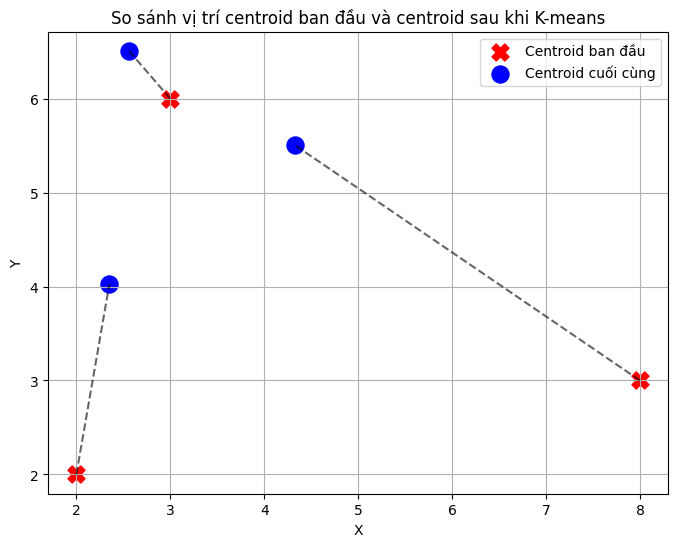

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# T·ªça ƒë·ªô centroid ban ƒë·∫ßu 
initial_centroids = np.array([
    [2, 2],
    [8, 3],
    [3, 6]
])

centroids_final = np.array([
    [2.35212925, 4.0274731],
    [4.32835926, 5.50403592],
    [2.56190952, 6.50725446]
])

plt.figure(figsize=(8,6))
plt.scatter(initial_centroids[:, 0], initial_centroids[:, 1], 
            c='red', marker='X', s=150, label='Centroid ban ƒë·∫ßu')
plt.scatter(centroids_final[:, 0], centroids_final[:, 1], 
            c='blue', marker='o', s=150, label='Centroid cu·ªëi c√πng')

for i in range(len(initial_centroids)):
    plt.plot([initial_centroids[i, 0], centroids_final[i, 0]],
             [initial_centroids[i, 1], centroids_final[i, 1]], 'k--', alpha=0.6)

plt.title('So s√°nh v·ªã tr√≠ centroid ban ƒë·∫ßu v√† centroid sau khi K-means')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


In [25]:
seeds = range(0, 10)
best_centroids, best_labels, best_iter, best_seed = run_kmeans_multiple_seeds(clusters, k=3, seeds=seeds)

Seed: 0 | Iterations: 7 | Loss: 1985.76
Seed: 1 | Iterations: 10 | Loss: 1985.76
Seed: 2 | Iterations: 8 | Loss: 1985.32
Seed: 3 | Iterations: 8 | Loss: 1985.42
Seed: 4 | Iterations: 8 | Loss: 1985.32
Seed: 5 | Iterations: 13 | Loss: 1985.76
Seed: 6 | Iterations: 13 | Loss: 1985.76
Seed: 7 | Iterations: 6 | Loss: 1985.32
Seed: 8 | Iterations: 8 | Loss: 1985.32
Seed: 9 | Iterations: 7 | Loss: 1985.76

 Best seed: 2 with loss = 1985.32


Seed 2 l√† l·ª±a ch·ªçn t·ªët nh·∫•t v·ªõi loss th·∫•p nh·∫•t v√† s·ªë v√≤ng l·∫∑p h·ª£p l√Ω.
K·∫øt qu·∫£ cho th·∫•y vi·ªác ch·∫°y K-Means nhi·ªÅu l·∫ßn v·ªõi c√°c kh·ªüi t·∫°o kh√°c nhau l√† c·∫ßn thi·∫øt ƒë·ªÉ tr√°nh r∆°i v√†o c·ª±c tr·ªã ƒë·ªãa ph∆∞∆°ng.

In [31]:
import numpy as np
for i in range(10):
    np.random.seed(9+i)
    centroids, labels, it = kmeans(clusters, k)
    print("seed number: ", 9+i, "number of iterations:", it)

seed number:  9 number of iterations: 7
seed number:  10 number of iterations: 6
seed number:  11 number of iterations: 14
seed number:  12 number of iterations: 16
seed number:  13 number of iterations: 14
seed number:  14 number of iterations: 5
seed number:  15 number of iterations: 5
seed number:  16 number of iterations: 7
seed number:  17 number of iterations: 4
seed number:  18 number of iterations: 7


- S·ªë v√≤ng l·∫∑p dao ƒë·ªông t·ª´ 4 ƒë·∫øn 16, cho th·∫•y m·ª©c ƒë·ªô h·ªôi t·ª• v·∫´n ph·ª• thu·ªôc v√†o kh·ªüi t·∫°o ban ƒë·∫ßu.
- Seed 17 h·ªôi t·ª• nhanh nh·∫•t (4 v√≤ng), trong khi seed 12 c·∫ßn ƒë·∫øn 16 v√≤ng ‚Üí c√≥ th·ªÉ do kh·ªüi t·∫°o xa t√¢m c·ª•m th·ª±c t·∫ø.
- Nhi·ªÅu seed h·ªôi t·ª• trong 5‚Äì7 v√≤ng, cho th·∫•y thu·∫≠t to√°n kh√° ·ªïn ƒë·ªãnh trong ph·∫ßn l·ªõn tr∆∞·ªùng h·ª£p.

In [32]:
for i in range(60):
    np.random.seed(i)
    centroids, labels, it = kmeans(clusters, k)
    print(centroids[-1])

[7.84137863 3.49811562]
[1.94139558 2.07448304]
[2.44220016 6.25733703]
[1.9532001  2.06229938]
[7.82773082 3.52419383]
[7.84137863 3.49811562]
[2.53481065 6.28740649]
[2.44220016 6.25733703]
[1.96713809 2.05011551]
[7.84137863 3.49811562]
[2.44220016 6.25733703]
[1.94139558 2.07448304]
[2.53481065 6.28740649]
[1.94139558 2.07448304]
[2.53481065 6.28740649]
[7.82773082 3.52419383]
[7.82773082 3.52419383]
[2.47872491 6.22756731]
[1.94139558 2.07448304]
[1.94139558 2.07448304]
[7.84137863 3.49811562]
[2.44220016 6.25733703]
[7.84137863 3.49811562]
[7.84137863 3.49811562]
[1.94139558 2.07448304]
[7.82773082 3.52419383]
[7.82773082 3.52419383]
[1.94139558 2.07448304]
[2.53481065 6.28740649]
[1.96713809 2.05011551]
[2.44220016 6.25733703]
[7.82773082 3.52419383]
[1.96713809 2.05011551]
[1.94139558 2.07448304]
[1.96713809 2.05011551]
[7.84137863 3.49811562]
[1.94139558 2.07448304]
[2.44220016 6.25733703]
[7.84137863 3.49811562]
[1.94139558 2.07448304]
[7.84137863 3.49811562]
[1.94139558 2.07

C√≥ 3 nh√≥m t·ªça ƒë·ªô ch√≠nh l·∫∑p l·∫°i nhi·ªÅu l·∫ßn:

- Kho·∫£ng [1.94, 2.07] ‚Üí c·ª•m g·∫ßn (2, 2)
- Kho·∫£ng [7.84, 3.50] ‚Üí c·ª•m g·∫ßn (8, 3)
- Kho·∫£ng [2.44‚Äì2.53, 6.25‚Äì6.29] ‚Üí c·ª•m g·∫ßn (3, 6)

C√°c gi√° tr·ªã n√†y r·∫•t ·ªïn ƒë·ªãnh, cho th·∫•y:
- K-Means h·ªôi t·ª• nh·∫•t qu√°n v·ªÅ c√°c t√¢m c·ª•m.
- D√π c√≥ nhi·ªÅu l·∫ßn kh·ªüi t·∫°o kh√°c nhau, thu·∫≠t to√°n v·∫´n t√¨m ra c√°c c·ª•m t∆∞∆°ng ·ª©ng v·ªõi ph√¢n ph·ªëi g·ªëc.

10


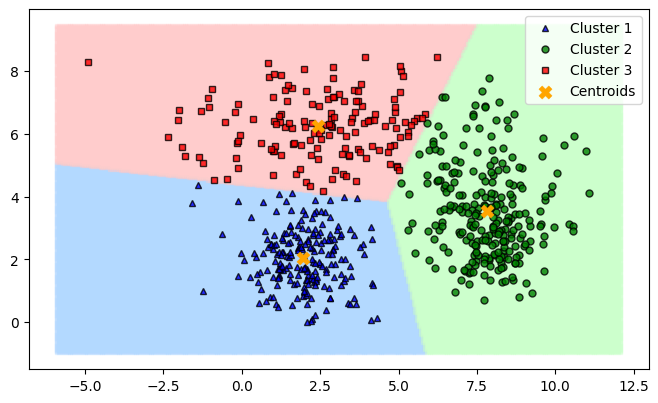

33


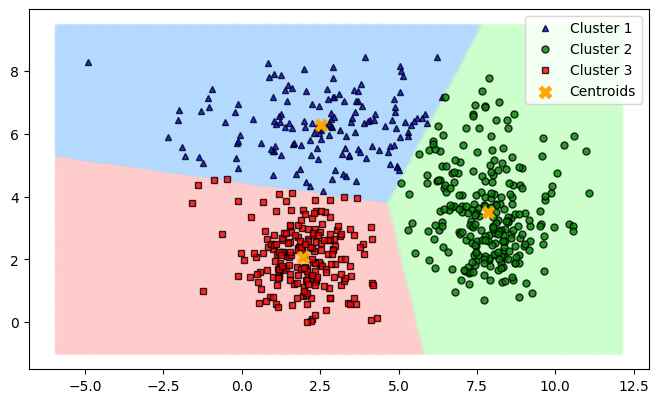

27


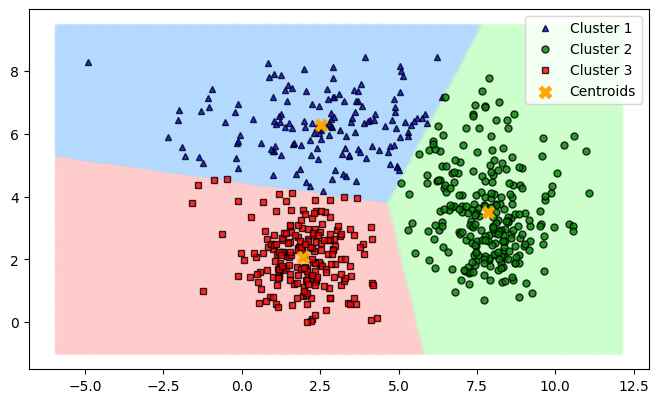

In [35]:
for i in [10, 33, 27]:
    np.random.seed(i)
    centroids, labels, it = kmeans(clusters, k)
    it = len(labels) - 1
    print(i)
    kmeans_display_with_background(clusters, centroids, labels, it)

K·∫øt qu·∫£ ph√¢n c·ª•m ·ªïn ƒë·ªãnh, nh∆∞ng s·ªë v√≤ng l·∫∑p v√† ƒë·ªô ch√≠nh x√°c v·∫´n ph·ª• thu·ªôc v√†o kh·ªüi t·∫°o ban ƒë·∫ßu

T√ìM L·∫†I:

Ph√¢n ph·ªëi 
$\mathcal{N}((3, 6), \Sigma_2)$
  c√≥ ph∆∞∆°ng sai l·ªõn theo tr·ª•c X, khi·∫øn c·ª•m d·ªØ li·ªáu b·ªã k√©o d√†i v√† ph√¢n t√°n. ƒêi·ªÅu n√†y vi ph·∫°m gi·∫£ ƒë·ªãnh c·ªßa K-Means v·ªÅ c√°c c·ª•m c√≥ h√¨nh c·∫ßu v√† k√≠ch th∆∞·ªõc t∆∞∆°ng ƒë∆∞∆°ng, d·∫´n ƒë·∫øn:

- T√¢m c·ª•m kh√≥ x√°c ƒë·ªãnh ch√≠nh x√°c
- Ranh gi·ªõi gi·ªØa c√°c c·ª•m b·ªã m·ªù
- D·ªÖ x·∫£y ra ph√¢n c·ª•m sai

‚Üí K·∫øt qu·∫£ l√† K-Means ho·∫°t ƒë·ªông k√©m hi·ªáu qu·∫£ h∆°n v·ªõi c·ª•m n√†y so v·ªõi c√°c c·ª•m c√≥ ph∆∞∆°ng sai ƒë·ªìng ƒë·ªÅu.